In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
url="https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json"
req=requests.get(url)

In [4]:
req

<Response [200]>

In [5]:
soup=BeautifulSoup(req.content)

In [ ]:
soup

In [7]:
df =pd.read_json("https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json",lines=True)

In [36]:
df


,_id,student_id,class_id,scores,exam_score,quiz_score,homework_score
0,50b59cd75bed76f46522c34e,0,2,"[{'type': 'exam', 'score': 57.92947112575566},...",57.929471,21.245426,51.65
1,50b59cd75bed76f46522c34f,0,28,"[{'type': 'exam', 'score': 39.17749400402234},...",39.177494,78.441728,58.32
2,50b59cd75bed76f46522c350,0,5,"[{'type': 'exam', 'score': 88.22950674232497},...",88.229507,79.289627,43.49
3,50b59cd75bed76f46522c351,0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ...",59.180567,47.589602,51.12
4,50b59cd75bed76f46522c352,0,24,"[{'type': 'exam', 'score': 4.444435759027499},...",4.444436,28.630579,66.45
...,...,...,...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,"[{'type': 'exam', 'score': 19.75901367795435},...",19.759014,88.302701,30.80
276,50b59cd75bed76f46522c462,48,14,"[{'type': 'exam', 'score': 66.79008851052096},...",66.790089,6.835625,52.55
277,50b59cd75bed76f46522c463,48,8,"[{'type': 'exam', 'score': 87.50309579619501},...",87.503096,77.950480,58.06
278,50b59cd75bed76f46522c464,48,15,"[{'type': 'exam', 'score': 17.49112864462374},...",17.491129,26.629811,52.28


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         280 non-null    object
 1   student_id  280 non-null    int64 
 2   class_id    280 non-null    int64 
 3   scores      280 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.9+ KB


In [23]:
new_id=
df["_df"]= new_id

SyntaxError: ignored

In [12]:
def remo(da):
  val=re.sub("^{.*: '|'}"," ",da)
  return val
df['_id']=df['_id'].astype(str)
df['_id']=df['_id'].apply(remo).astype(str)

In [ ]:
df

In [13]:
df.scores[0]

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'quiz', 'score': 21.24542588206755},
 {'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

In [14]:
df['scores'].iloc[0]

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'quiz', 'score': 21.24542588206755},
 {'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

In [15]:
df['scores'][0]

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'quiz', 'score': 21.24542588206755},
 {'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

In [16]:
def new_1(val1):
  return val1[0]['score']

df['exam_score']=df['scores'].apply(new_1)

def new_2(val2):
  return val2[1]['score']

df['quiz_score']=df['scores'].apply(new_2)

def new_3(val_3):
  one=val_3[-3]['score']
  two=val_3[-2]['score']
  three=val_3[-1]['score']
  return round((one+two+three)/3,2)

df['homework_score']=df['scores'].apply(new_3)




In [31]:
exam_score=[round(float(re.sub('^{.*: |}', '' ,str(df['scores'][i][0]))),2) for i in range(len(df['scores'])) ]

quiz_score=[round(float(re.sub('^{.*: |}', '' ,str(df['scores'][i][1]))),2) for i in range(len(df['scores'])) ]








In [32]:
homework_score=[]
for i in range(len(df['scores'])):
  homework_score.append(round(sum(list(map(float,re.findall('\d+.\d+',str(df['scores'][i][2:])))))/len(list(map(float,re.findall('\d+.\d+',str(df['scores'][i][2:])))))))

In [ ]:
homework_score

In [34]:
new_df=pd.DataFrame({"id":df['_id']  , "student_id":df['student_id'], "class_id":df['class_id'],
                     "exam_score":exam_score,  "quiz_score":quiz_score , "homework_score":homework_score  })

In [35]:
new_df


,id,student_id,class_id,exam_score,quiz_score,homework_score
0,50b59cd75bed76f46522c34e,0,2,57.93,21.25,52
1,50b59cd75bed76f46522c34f,0,28,39.18,78.44,49
2,50b59cd75bed76f46522c350,0,5,88.23,79.29,37
3,50b59cd75bed76f46522c351,0,16,59.18,47.59,51
4,50b59cd75bed76f46522c352,0,24,4.44,28.63,85
...,...,...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,19.76,88.30,31
276,50b59cd75bed76f46522c462,48,14,66.79,6.84,84
277,50b59cd75bed76f46522c463,48,8,87.50,77.95,60
278,50b59cd75bed76f46522c464,48,15,17.49,26.63,52


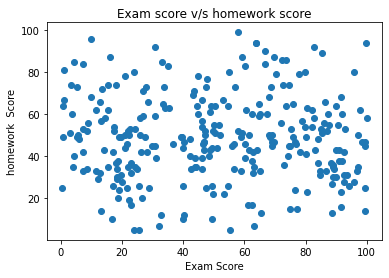

In [40]:
x = new_df.exam_score
y = new_df.homework_score
plt.scatter(x,y)
plt.xlabel('Exam Score')
plt.ylabel('homework  Score')
plt.title('Exam score v/s homework score')
plt.show()